## Unidad 2:

## Taller #4

### Interpolación

- Interpolación Lineal
- Interpolación de Lagrange
- Interpolación de Newton
- Interpolacón de Hermite


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('bmh')

**1** Supongamos que tienes un conjunto de datos que registra la posición de un objeto en movimiento en intervalos de tiempo iguales. Los datos son los siguientes: $t=[0,2,4,6,8]$ en segundos y $x=[0,20,80,180,320]$ en metros encuentra el pilnomio de iterpolación de lagrange implementado en clase, grafica y responde:

¿Cuál es la posición del objeto en el instante de tiempo $t = 5$ segundos?

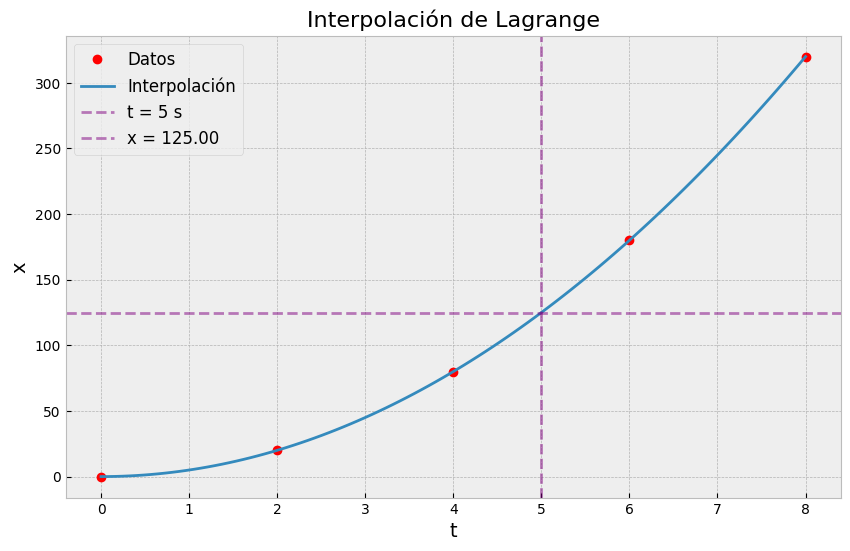

In [24]:
from scipy.interpolate import lagrange

t = [0, 2, 4, 6, 8]
x = [0, 20, 80, 180, 320]

poly = lagrange(t, x) # Interpolación de Lagrange

# Puntos de interpolación
t_nuevo = np.linspace(0, 8, 100)
x_nuevo = poly(t_nuevo)

plt.figure(figsize=(10, 6))
plt.plot(t, x, 'ro', label='Datos')  # Gráfico los datos originales
plt.plot(t_nuevo, x_nuevo, label='Interpolación', linewidth=2)  # Gráfico de la interpolación

# Línea vertical en t=5 y una línea horizontal en el valor de x correspondiente
t_linea = 5
x_linea = poly(t_linea)
plt.axvline(t_linea, color='purple', linestyle='--', label='t = 5 s', alpha=0.5)  # Línea vertical
plt.axhline(x_linea, color='purple', linestyle='--', label=f'x = {x_linea:.2f}', alpha=0.5)  # Línea horizontal

plt.title('Interpolación de Lagrange', fontsize=16)
plt.xlabel('t', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

Respuesta: Para un tiempo $t = 5 \space \text{s}$ le corresponde una distancia en $x=125 \space \text{metros}$

**2** Considere el problema anteriror y agrege los datos de $v=[10,15,25,30,35]$ en $m/s$ encuentre el polinomio de hermite implementado en clase y determine la posición del objeto en $t = 3.75$ segundos.

In [31]:
from scipy.interpolate import CubicHermiteSpline

v = [20, 30, 40, 50, 60]  # Velocidades
interpolacion_hermite = CubicHermiteSpline(t, x, v) # función de interpolación

print(f'Interpolación con hermite para el tiempo 3.75: {interpolacion_hermite(3.75)} metros')

Interpolación con hermite para el tiempo 3.75: 70.5859375 metros


**3** Supongamos que tienes datos de temperaturas registradas en diferentes momentos del día en una ubicación específica. Los datos son los siguientes:
$t=[0,2,4,6,8]$ en horas y T=[20,22,24,27,30]. Consulte, utilice e implemente en python la interpolación de Horner para encontrar un polinomio que describa cómo varía la temperatura en función del tiempo.

¿Cuál es la temperatura estimada a las 3 horas?

¿Cuál es la temperatura estimada a las 5 horas?

¿Cuál es la temperatura estimada a las 7 horas?

In [32]:
t = [0, 2, 4, 6, 8] # tiempo en horas
T = [20, 22, 24, 27, 30] # temperatura en grados Celsius

# Implementación de la interpolación de Horner
def horner(t, T, t_eval):
    n = len(t)  # Obtenemos el número de puntos
    T_eval = 0  # Inicializamos el valor del polinomio en el punto de evaluación
    for i in range(n):  # Recorremos cada punto
        L = 1  # Inicializamos el valor del polinomio de Lagrange para el punto i
        for j in range(n):  # Recorremos cada punto de nuevo
            if i != j:  # Si no estamos en el punto i
                # Calculamos el valor del polinomio de Lagrange para el punto i
                L *= (t_eval - t[j]) / (t[i] - t[j])
        # Sumamos el valor del polinomio de Lagrange para el punto i multiplicado por el valor de la función en el punto i
        T_eval += T[i] * L
    return T_eval  # Devolvemos el valor del polinomio en el punto de evaluación

print(f'Interpolación con Horner para el tiempo 3 horas: {horner(t, T, 3)} grados Celsius')

Interpolación con Horner para el tiempo 3 horas: 22.890625 grados Celsius


**4** Imagina que estás analizando el movimiento de un automóvil que viaja por una carretera recta. Durante un viaje, se registraron la velocidad del automóvil en varios momentos. Los datos son los siguientes: $t=[0,2,4,6,8]$ en segundos y $v=[0,10,20,30,40]$ en $m/s$

**A** Consulta el método de cubic spline e implementalo en python (sin libreria).

**B**Utiliza esta función para calcular la velocidad estimada en los momentos dados (3 segundos y 5 segundos) y para encontrar el tiempo en el que la velocidad es igual a 35 m/s.

**5** Supongamos que estás trabajando en un proyecto astronómico que involucra el seguimiento de un cometa en su órbita alrededor del Sol. Tienes datos de la posición del cometa registrados en diferentes momentos a lo largo de varios años. Los datos incluyen la distancia del cometa al Sol y el ángulo polar en coordenadas polares.

Los datos disponibles son los siguientes:

$t=[0,1,2,3,4,5]$ en años

$D=[2.5,2.8,3.3,4.0,4.9,6.2]$ en UA

$\theta=[30,45,60,80,110,150]$ en grados

Usa tres métodos de interpolación de python (libreria) que sean de su elección para encontrar el polinomio de interpolación y responder:

¿Cuál es la distancia estimada del cometa al Sol y el ángulo polar en $t = 2.5$ años?

¿En qué año el cometa alcanzará su máxima distancia al Sol?

¿Cuál es el ángulo polar estimado en ese momento?

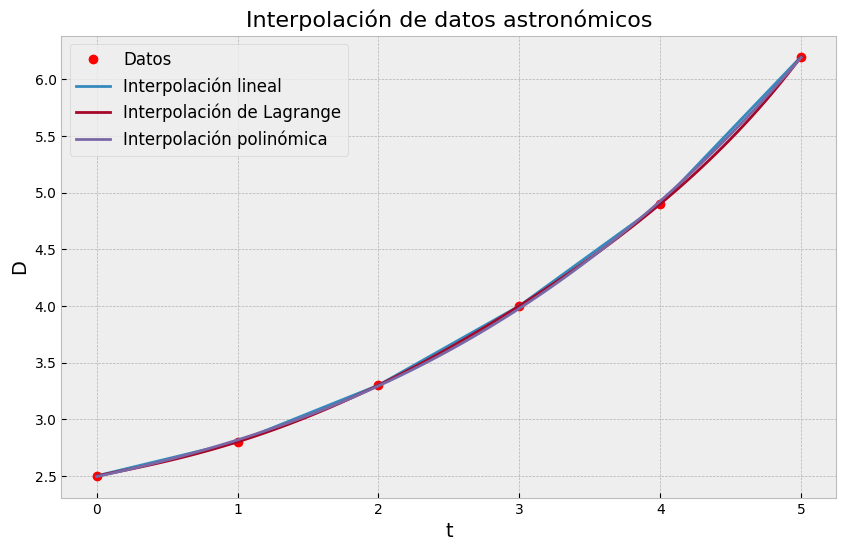

In [47]:
# Definición de datos
t = [0,1,2,3,4,5] # tiempo en años
D = [2.5,2.8,3.3,4.0,4.9,6.2] # unidades astronómicas
theta = [30,45,60,80,110,150] # ángulo en grados

# Definición de tres métodos de interpolación de scipy
from scipy.interpolate import interp1d, lagrange
import numpy.polynomial.polynomial as polynomial

# Interpolación lineal
interpolacion_lineal = interp1d(t, D, kind='linear')

# Interpolación de Lagrange
poly = lagrange(t, D)

# Interpolación polinómica
coeficientes = polynomial.polyfit(t, D, 3)
interpolacion_polinomica = polynomial.Polynomial(coeficientes)

# Puntos de interpolación
t_nuevo = np.linspace(0, 5, 100)
D_lineal = interpolacion_lineal(t_nuevo)
D_lagrange = poly(t_nuevo)
D_polinomica = interpolacion_polinomica(t_nuevo)

plt.figure(figsize=(10, 6))
plt.plot(t, D, 'ro', label='Datos')  # Gráfico los datos originales
plt.plot(t_nuevo, D_lineal, label='Interpolación lineal', linewidth=2)  # Gráfico de la interpolación lineal
plt.plot(t_nuevo, D_lagrange, label='Interpolación de Lagrange', linewidth=2)  # Gráfico de la interpolación de Lagrange
plt.plot(t_nuevo, D_polinomica, label='Interpolación polinómica', linewidth=2)  # Gráfico de la interpolación polinómica

plt.title('Interpolación de datos astronómicos', fontsize=16)
plt.xlabel('t', fontsize=14)
plt.ylabel('D', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()
